#KNN Algoritması ile İnsülin Tahmini

Bu proje, verilen bir "CSV" veri seti üzerinde K-Nearest Neighbors (KNN) algoritması kullanılarak insülin doz tahmini yapmayı amaçlar.
Model, çeşitli parametrelerini kullanarak hastanın hangi insülin sınıfına ait olduğunu tahmin etmeye çalışır.

##Projede Kullanılan Teknolojiler

1-Python 3.x

2-Pandas – Veri işleme

3-Scikit-Learn

4-LabelEncoder 

5-StandardScaler 

6-KNeighborsClassifier

7-Train-test split

8-Matplotlib 

9-CSV veri seti

###Kullanılan Kütüphaneler

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

###Veri Setinin Okunması ve "String" Türündeki verilerin Sayısallaştırılması

In [14]:
df = pd.read_csv(r"C:\Users\ahmet\Desktop\Ders\Makine Öğrenmesine Giriş\Ödev 1\veri.csv")

print(df.head())
print(df.info())

label_cols = ["gender", "family_history", "food_intake", 
              "previous_medications", "Insulin"]

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df.head())

X = df.drop("Insulin", axis=1)
y = df["Insulin"]

   patient_id  gender  age family_history  glucose_level  physical_activity  \
0           1    male   68            yes         103.49               9.28   
1           2  female   57            yes         113.35               6.67   
2           3    male   24            yes         127.40               4.14   
3           4    male   49            yes         138.79               6.80   
4           5    male   65             no         128.42               4.01   

  food_intake previous_medications    BMI  HbA1c  weight  insulin_sensitivity  \
0        high                 none  33.87   7.42   54.77                 1.49   
1        high              insulin  19.10  11.66  114.93                 1.35   
2      medium                 oral  22.48   5.72   59.07                 0.96   
3      medium                 oral  31.67  11.91   50.81                 0.61   
4         low              insulin  28.50   5.72   65.95                 1.16   

   sleep_hours  creatinine Insulin  
0

###Verinin Eğitim ve Test İçin Ayrılması

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###Verilerin Ölçeklendirilmesi

In [16]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###KNN Modelinin Oluşturulması ve Eğitilmesi

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


###Modelin Değerlendirilmesi

In [18]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Dogruluk:" , accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix:")
print(conf_matrix)

Dogruluk: 0.7076666666666667
confusion_matrix:
[[  58    7   84   41]
 [  13   92  105   13]
 [  55  106 1272  161]
 [  41   45  206  701]]


###Hiperparametre Ayarlaması

In [19]:
accuracy_values = []
k_values = []
for k in range (1, 100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

###Sonuçların Grafik ile Gösterilmesi

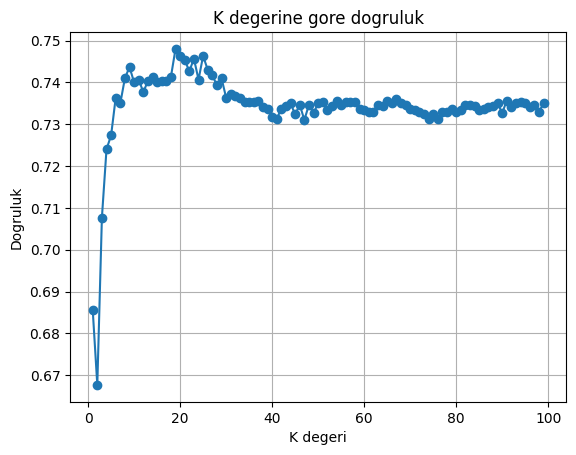

In [20]:
plt.figure()
plt.plot(k_values, accuracy_values, marker = "o", linestyle = "-")
plt.title("K degerine gore dogruluk")
plt.xlabel("K degeri")
plt.ylabel("Dogruluk")
plt.grid(True)

plt.show()

###Random Fores Modelinin Oluşturulması ve Eğitilmesi

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=40)
rf.fit(X_train, y_train)

###Özellik Önemlerinin Alınması ve DataFrame'e Dönüştürülmesi

In [ ]:
importances = rf.feature_importances_
importance_df = pd.DataFrame(
    {
    "Ozellik": X.columns,
    "Onem": importances
    }
).sort_values(by = "Onem", ascending = False)

###Bar Grafiğinin Oluşturulması

In [ ]:
plt.figure(figsize = (8, 5))
plt.bar(importance_df["Ozellik"], importance_df["Onem"])
plt.title("Random Forest Ozellik Onem Grafigi")
plt.xlabel("Ozellikler")
plt.ylabel("Onem Skoru")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()